### imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

### Loading step

Synthetic Transactions: https://www.kaggle.com/ntnu-testimon/paysim1

In [3]:
# Load file
dataset = pd.read_csv('data/PS_20174392719_1491204439457_log.csv')

# Remove types that never are fraud
dataset = dataset.loc[dataset['type'] != 'PAYMENT']
dataset = dataset.loc[dataset['type'] != 'DEBIT']
dataset = dataset.loc[dataset['type'] != 'CASH_IN']

dataset = dataset.loc[dataset['amount'] >= 3]

### Sample the data

In [4]:
trainset = dataset.sample(frac=0.05)
testset = dataset.sample(frac=0.05)

### Train dataset information

In [5]:
train_qtd = trainset.shape[0]
train_fraud_qtd = len(list(filter(lambda x: x == 1, trainset['isFraud'])))
train_nonfraud_qtd = len(list(filter(lambda x: x == 0, trainset['isFraud'])))
train_proportion = train_fraud_qtd / train_qtd

print('train_total:', train_qtd)
print('train_fraud:', train_fraud_qtd)
print('train_nonfraud', train_nonfraud_qtd)
print('train_fraud proportion', train_proportion)
trainset.head()

train_total: 138518
train_fraud: 384
train_nonfraud 138134
train_fraud proportion 0.0027722028905990555


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
128158,11,TRANSFER,1718117.51,C2133199793,0.00,0.00,C2107960573,2979184.35,4748916.38,0,0
278753,15,CASH_OUT,108592.28,C970425075,0.00,0.00,C343563320,1257377.89,681029.68,0,0
2098997,182,CASH_OUT,233386.45,C613499733,40724.00,0.00,C1466852428,409357.22,642743.68,0,0
2513215,205,TRANSFER,202988.10,C898588555,458546.71,255558.61,C1578086863,514983.75,720392.52,0,0
482844,19,CASH_OUT,205380.42,C1336458024,118427.26,0.00,C1617763185,0.00,508659.35,0,0


### Test dataset information

In [6]:
test_qtd = testset.shape[0]
test_fraud_qtd = len(list(filter(lambda x: x == 1, testset['isFraud'])))
test_nonfraud_qtd = len(list(filter(lambda x: x == 0, testset['isFraud'])))
test_proportion = test_fraud_qtd / test_qtd

print('test_total:', test_qtd)
print('test_fraud:', test_fraud_qtd)
print('test_nonfraud', test_nonfraud_qtd)
print('test_fraud proportion', test_proportion)
testset.head()

test_total: 138518
test_fraud: 429
test_nonfraud 138089
test_fraud proportion 0.0030970704168411327


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5696377,397,CASH_OUT,179688.18,C1500748434,20127.0,0.0,C461229928,532402.62,712090.81,0,0
5801014,401,CASH_OUT,60189.37,C930805500,2032.0,0.0,C1024876409,439295.01,636059.17,0,0
4768491,334,CASH_OUT,111832.77,C911605891,0.0,0.0,C1250041858,507694.41,619527.18,0,0
4573915,328,TRANSFER,4979581.82,C862123792,644956.0,0.0,C178321564,1507233.56,6486815.38,0,0
1432622,139,CASH_OUT,190518.02,C1760223044,105.0,0.0,C1019765161,1350329.88,1540847.90,0,0


### Labs

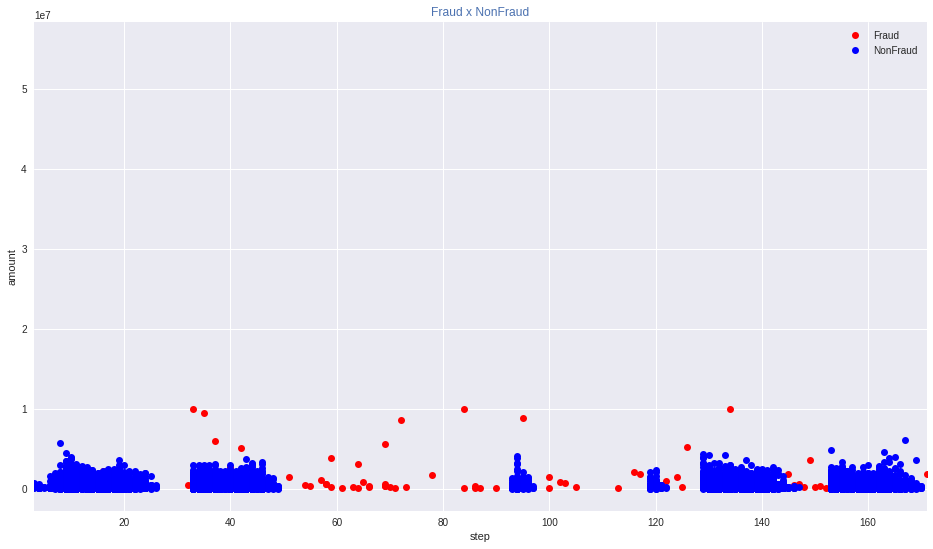

In [7]:
def plot(x_value, y_value):
    mpl.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(16, 9))
    
    train_frauds = trainset.loc[trainset['isFraud'] == 1]
    train_non_frauds = trainset.loc[trainset['isFraud'] == 0]

    x_fraud = train_frauds[[x_value]]
    y_fraud = train_frauds[[y_value]]

    x_nonfraud = train_non_frauds[[x_value]]
    y_nonfraud = train_non_frauds[[y_value]]

    ax.set_title('Fraud x NonFraud', color='C0')

    ax.plot(x_fraud, y_fraud, 'ro', label='Fraud')
    ax.plot(x_nonfraud, y_nonfraud, 'bo', label='NonFraud')
    
    ax.set_xlabel(x_value)
    ax.set_ylabel(y_value)
    
    ax.set_xlim([3,171])
    
    ax.legend()
    
plot('step', 'amount')